In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")


import acquire

In [2]:
df= acquire.get_telco_data()

Using cached csv


In [3]:
df.head(3)

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,2,2,1,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,DSL,One year,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,DSL,Month-to-month,Mailed check
2,1,1,2,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Fiber optic,Month-to-month,Electronic check


In [4]:
df.shape

(7043, 24)

In [5]:
df.drop_duplicates()

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,2,2,1,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.60,593.3,No,DSL,One year,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.90,542.4,No,DSL,Month-to-month,Mailed check
2,1,1,2,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.90,280.85,Yes,Fiber optic,Month-to-month,Electronic check
3,1,1,2,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.00,1237.85,Yes,Fiber optic,Month-to-month,Electronic check
4,2,1,2,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.90,267.4,Yes,Fiber optic,Month-to-month,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,2,1,9987-LUTYD,Female,0,No,No,13,Yes,...,Yes,No,No,No,55.15,742.9,No,DSL,One year,Mailed check
7039,1,1,2,9992-RRAMN,Male,0,Yes,No,22,Yes,...,No,No,Yes,Yes,85.10,1873.7,Yes,Fiber optic,Month-to-month,Electronic check
7040,2,1,1,9992-UJOEL,Male,0,No,No,2,Yes,...,No,No,No,Yes,50.30,92.75,No,DSL,Month-to-month,Mailed check
7041,2,3,1,9993-LHIEB,Male,0,Yes,Yes,67,Yes,...,Yes,No,Yes,No,67.85,4627.65,No,DSL,Two year,Mailed check


In [6]:
drop_columns = ['payment_type_id', 'internet_service_type_id', 'contract_type_id']

df = df.drop(columns = drop_columns)

In [7]:
df.head(3)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,DSL,One year,Mailed check
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,No,No,Yes,No,59.9,542.4,No,DSL,Month-to-month,Mailed check
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,No,No,No,Yes,73.9,280.85,Yes,Fiber optic,Month-to-month,Electronic check


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            7043 non-null   object 
 1   gender                 7043 non-null   object 
 2   senior_citizen         7043 non-null   int64  
 3   partner                7043 non-null   object 
 4   dependents             7043 non-null   object 
 5   tenure                 7043 non-null   int64  
 6   phone_service          7043 non-null   object 
 7   multiple_lines         7043 non-null   object 
 8   online_security        7043 non-null   object 
 9   online_backup          7043 non-null   object 
 10  device_protection      7043 non-null   object 
 11  tech_support           7043 non-null   object 
 12  streaming_tv           7043 non-null   object 
 13  streaming_movies       7043 non-null   object 
 14  paperless_billing      7043 non-null   object 
 15  mont

In [9]:
df.total_charges = pd.to_numeric(df.total_charges, errors = 'coerce')
df['total_charges']

0        593.30
1        542.40
2        280.85
3       1237.85
4        267.40
         ...   
7038     742.90
7039    1873.70
7040      92.75
7041    4627.65
7042    3707.60
Name: total_charges, Length: 7043, dtype: float64

In [10]:
df.total_charges.isna().value_counts()

False    7032
True       11
Name: total_charges, dtype: int64

In [11]:
# Didn't mess anything up?..
df.head(3)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,Yes,Yes,No,Yes,65.6,593.30,No,DSL,One year,Mailed check
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,No,No,Yes,No,59.9,542.40,No,DSL,Month-to-month,Mailed check
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,No,No,No,Yes,73.9,280.85,Yes,Fiber optic,Month-to-month,Electronic check


In [12]:
# Dummies that are easily binary
dummy_df1 = pd.get_dummies(df[['gender', 'partner', 'dependents', 'online_security', 'online_backup', 'phone_service',
                              'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 
                              'paperless_billing', 'churn']], drop_first = True)


# Dummies that have multiple outcomes (more than 2)
dummy_df2 = pd.get_dummies(df[['multiple_lines', 'contract_type', 'internet_service_type', 'payment_type']])

In [13]:
# Drop dulplicates after work above
drop_cols = ['gender', 'partner', 'dependents', 'online_security', 'phone_service',
             'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
             'streaming_movies', 'paperless_billing', 'churn']
df = df.drop(columns = drop_cols)

df.head()

,customer_id,senior_citizen,tenure,multiple_lines,monthly_charges,total_charges,internet_service_type,contract_type,payment_type
0,0002-ORFBO,0,9,No,65.6,593.30,DSL,One year,Mailed check
1,0003-MKNFE,0,9,Yes,59.9,542.40,DSL,Month-to-month,Mailed check
2,0004-TLHLJ,0,4,No,73.9,280.85,Fiber optic,Month-to-month,Electronic check
3,0011-IGKFF,1,13,No,98.0,1237.85,Fiber optic,Month-to-month,Electronic check
4,0013-EXCHZ,1,3,No,83.9,267.40,Fiber optic,Month-to-month,Mailed check


In [14]:
df = pd.concat([df, dummy_df1, dummy_df2], axis = 1)

In [15]:
df.head(3)

,customer_id,senior_citizen,tenure,multiple_lines,monthly_charges,total_charges,internet_service_type,contract_type,payment_type,gender_Male,...,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,0,9,No,65.6,593.30,DSL,One year,Mailed check,0,...,0,1,0,1,0,0,0,0,0,1
1,0003-MKNFE,0,9,Yes,59.9,542.40,DSL,Month-to-month,Mailed check,1,...,1,0,0,1,0,0,0,0,0,1
2,0004-TLHLJ,0,4,No,73.9,280.85,Fiber optic,Month-to-month,Electronic check,1,...,1,0,0,0,1,0,0,0,1,0


In [16]:
df.columns.tolist()

['customer_id',
 'senior_citizen',
 'tenure',
 'multiple_lines',
 'monthly_charges',
 'total_charges',
 'internet_service_type',
 'contract_type',
 'payment_type',
 'gender_Male',
 'partner_Yes',
 'dependents_Yes',
 'online_security_No internet service',
 'online_security_Yes',
 'online_backup_No internet service',
 'online_backup_Yes',
 'phone_service_Yes',
 'device_protection_No internet service',
 'device_protection_Yes',
 'tech_support_No internet service',
 'tech_support_Yes',
 'streaming_tv_No internet service',
 'streaming_tv_Yes',
 'streaming_movies_No internet service',
 'streaming_movies_Yes',
 'paperless_billing_Yes',
 'churn_Yes',
 'multiple_lines_No',
 'multiple_lines_No phone service',
 'multiple_lines_Yes',
 'contract_type_Month-to-month',
 'contract_type_One year',
 'contract_type_Two year',
 'internet_service_type_DSL',
 'internet_service_type_Fiber optic',
 'internet_service_type_None',
 'payment_type_Bank transfer (automatic)',
 'payment_type_Credit card (automatic)'

In [17]:
df.rename(columns ={ 'gender_Male': 'is_male',
                    'partner_Yes': 'has_partner',
                    'dependents_Yes': 'has_dependents',
                    'online_security_Yes': 'online_security',
                    'online_backup_Yes': 'online_backup',
                    'phone_service_Yes': 'phone_service',
                    'device_protection_Yes': 'device_protection',
                    'tech_support_Yes': 'tech_support',
                    'streaming_tv_Yes': 'streaming_tv',
                    'streaming_movies_Yes': 'streaming_movies',
                    'paperless_billing_Yes': 'paperless_billing',
                    'churn_Yes': 'churn',
                    'multiple_lines_No': 'one_line',
                    'multiple_lines_No phone service': 'no_phone_service',
                    'multiple_lines_Yes': 'has_multiple_lines',
                    'contract_type_Month-to-month': 'month_to_month_contract',
                    'contract_type_One year': 'one_year_contract',
                    'contract_type_Two year': 'two_year_contract',
                    'internet_service_type_DSL': 'dsl_internet',
                    'internet_service_type_Fiber optic': 'fiber_optic_internet',
                    'internet_service_type_None': 'no_internet_service',
                    'payment_type_Bank transfer (automatic)': 'bank_transfer_auto',
                    'payment_type_Credit card (automatic)': 'credit_card_auto',
                    'payment_type_Electronic check': 'electronic_check_nonauto',
                    'payment_type_Mailed check': 'mailed_check_nonauto'}, 
          inplace = True)

In [18]:
df.head(3)

,customer_id,senior_citizen,tenure,multiple_lines,monthly_charges,total_charges,internet_service_type,contract_type,payment_type,is_male,...,month_to_month_contract,one_year_contract,two_year_contract,dsl_internet,fiber_optic_internet,no_internet_service,bank_transfer_auto,credit_card_auto,electronic_check_nonauto,mailed_check_nonauto
0,0002-ORFBO,0,9,No,65.6,593.30,DSL,One year,Mailed check,0,...,0,1,0,1,0,0,0,0,0,1
1,0003-MKNFE,0,9,Yes,59.9,542.40,DSL,Month-to-month,Mailed check,1,...,1,0,0,1,0,0,0,0,0,1
2,0004-TLHLJ,0,4,No,73.9,280.85,Fiber optic,Month-to-month,Electronic check,1,...,1,0,0,0,1,0,0,0,1,0


In [19]:
df.columns.tolist()

['customer_id',
 'senior_citizen',
 'tenure',
 'multiple_lines',
 'monthly_charges',
 'total_charges',
 'internet_service_type',
 'contract_type',
 'payment_type',
 'is_male',
 'has_partner',
 'has_dependents',
 'online_security_No internet service',
 'online_security',
 'online_backup_No internet service',
 'online_backup',
 'phone_service',
 'device_protection_No internet service',
 'device_protection',
 'tech_support_No internet service',
 'tech_support',
 'streaming_tv_No internet service',
 'streaming_tv',
 'streaming_movies_No internet service',
 'streaming_movies',
 'paperless_billing',
 'churn',
 'one_line',
 'no_phone_service',
 'has_multiple_lines',
 'month_to_month_contract',
 'one_year_contract',
 'two_year_contract',
 'dsl_internet',
 'fiber_optic_internet',
 'no_internet_service',
 'bank_transfer_auto',
 'credit_card_auto',
 'electronic_check_nonauto',
 'mailed_check_nonauto']

In [20]:
# Specify numeric and categorical columns
num_cols = ['senior_citizen', 'multiple_lines', 'contract_type', 
            'internet_service_type', 'payment_type', 'is_male', 
            'has_partner', 'has_dependents', 'online_security', 
            'online_backup', 'device_protection', 'tech_support',
            'streaming_tv', 'streaming_movies', 'paperless_billing', 
            'churn']


cat_cols = list(df.dtypes[df.dtypes == 'object'].index)


## Exploration

Start with a few histograms to see the infomation better. Keep in mind most numberic columns are binary.

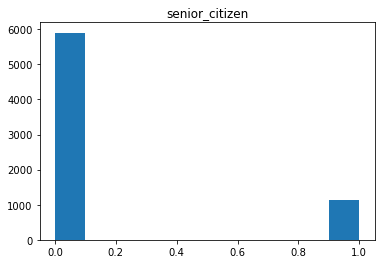

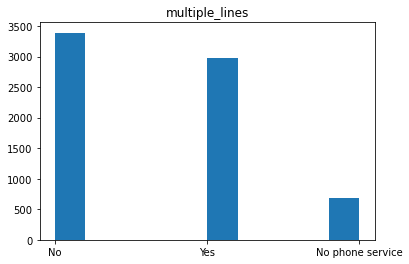

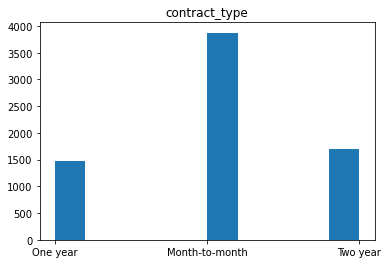

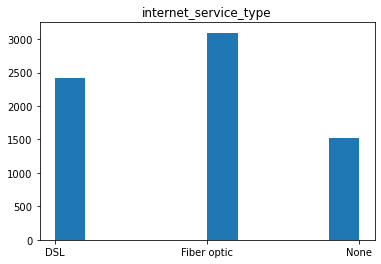

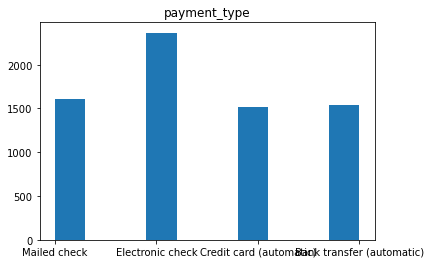

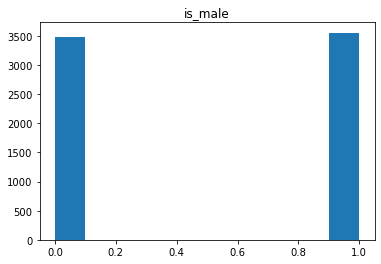

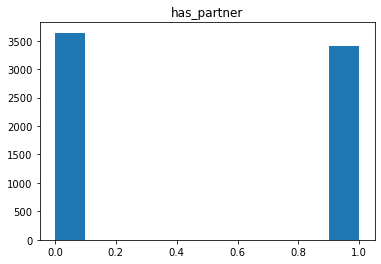

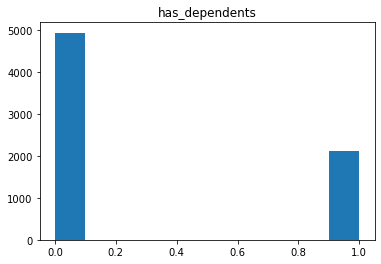

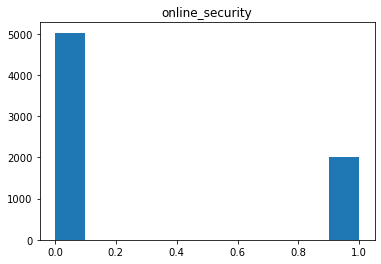

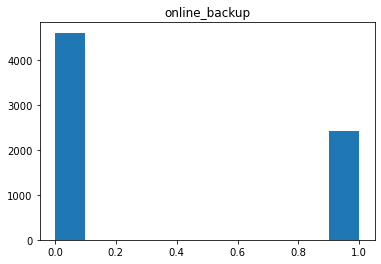

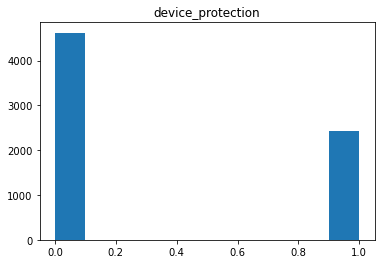

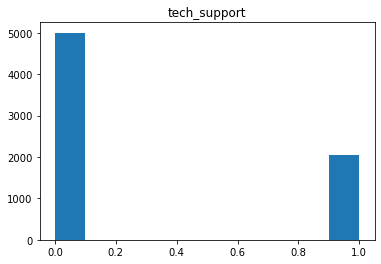

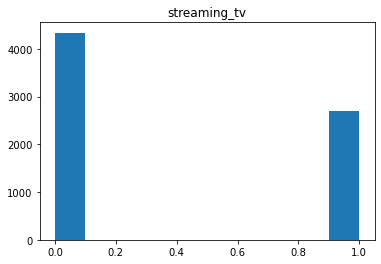

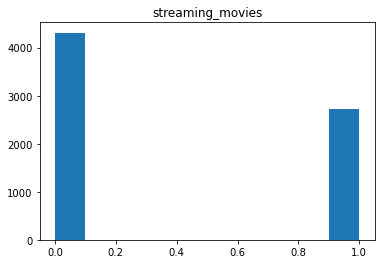

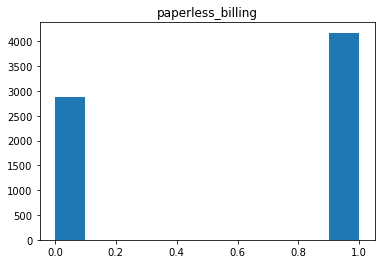

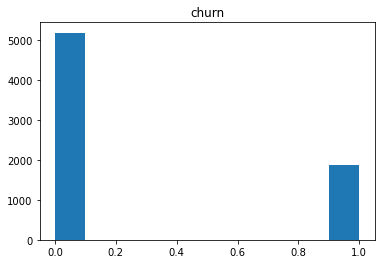

In [21]:
for col in num_cols: 
    plt.hist(df[col])
    plt.title(col)
    plt.show()

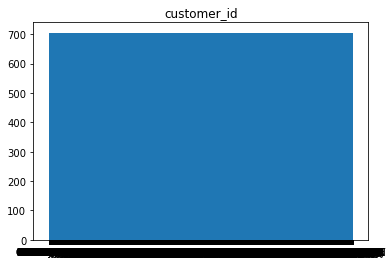

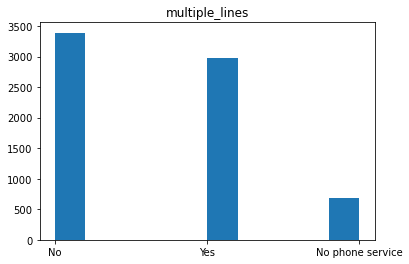

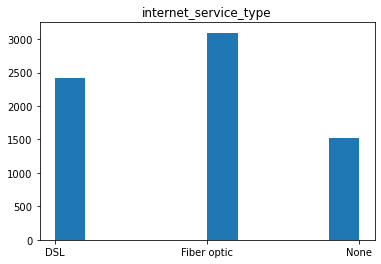

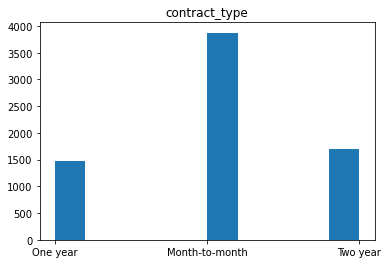

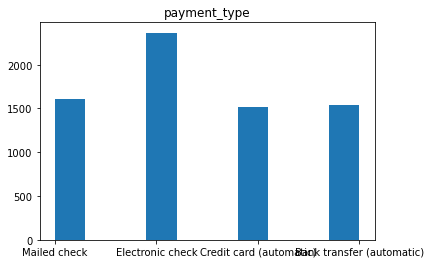

In [22]:
for col in cat_cols: 
    plt.hist(df[col])
    plt.title(col)
    plt.show()

## Split Data

In [23]:
def split_telco(df):
    '''
    Function for splitting data. The first split will be to reserve 20%
    of all data for test. The remaining 80% will be split into 70/30 for
    the train and validate, respectively. This function will return the
    train, validate, and test DataFrames.
    '''
 
    train_validate, test = train_test_split(df, test_size=.2, 
                                            random_state=123, 
                                            stratify=df.churn)

    train, validate = train_test_split(train_validate, test_size=.3, 
                                       random_state=123, 
                                       stratify=train_validate.churn)
    return train, validate, test

In [24]:
# Verify the split was done properly looking at the shape of each
train, validate, test = split_telco(df)

train.shape, validate.shape, test.shape

((3943, 40), (1691, 40), (1409, 40))

## Questions...


1.) What categories are the highest in terms of correlation with churn?

        - month-to-month contracts
        - fiber optic internet
        - electronic check
        - monthly charges
        - paperless billing
        - senior citizens

2.) How far into tenure do churners leave?

        - Most churning happens in the first year

3.) What is the difference in churn between contract type?
 
           Total churners in each group
           
        - Month-to-month.............2170
        - Two year....................924
        - One year....................849

4.) Does internet type really influence churn?

        - Fiber optic internet has a much higher 
          influence on churn than DSL does and
          both influence churn MUCH more than
          no internet service at all.



<AxesSubplot:>

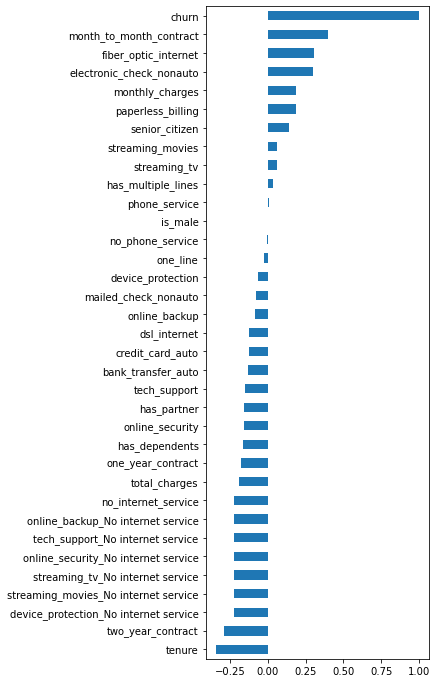

In [25]:
# Take a look at how all categories correlate to churn with a horizontal
# bar plot.

train.corr()['churn'].sort_values().plot(kind='barh', figsize=(4,12))

            customer_id_counts
7503-MIOGA                   1
9112-WSNPU                   1
9504-YAZWB                   1
5940-AHUHD                   1
6244-BESBM                   1
...                        ...
9239-GZHZE                   1
0112-QAWRZ                   1
5088-QZLRL                   1
0174-QRVVY                   1
9681-KYGYB                   1

[3943 rows x 1 columns]


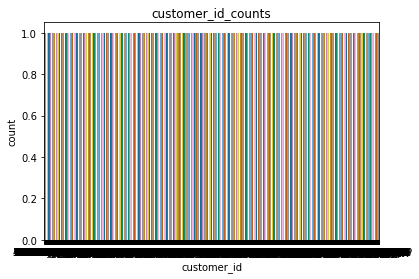

                  multiple_lines_counts
No                                 1881
Yes                                1697
No phone service                    365


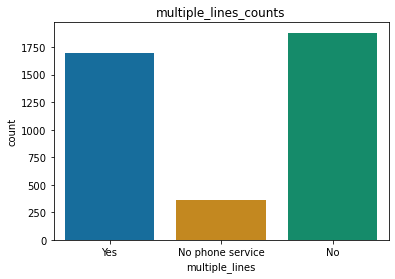

             internet_service_type_counts
Fiber optic                          1745
DSL                                  1349
None                                  849


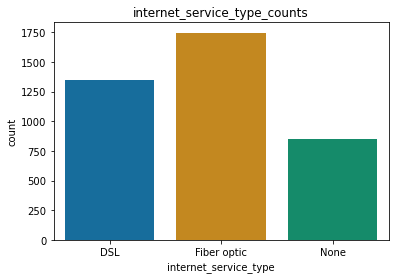

                contract_type_counts
Month-to-month                  2170
Two year                         924
One year                         849


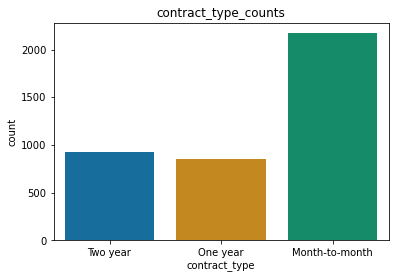

                           payment_type_counts
Electronic check                          1328
Mailed check                               877
Bank transfer (automatic)                  873
Credit card (automatic)                    865


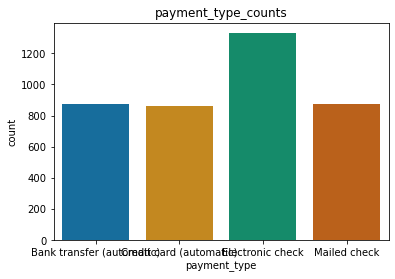

In [68]:
# Take a look at categorical columns
for col in cat_cols:
    
    # Display the counts of each category
    print(pd.DataFrame(train[col].value_counts())
          .rename(columns={col: f'{col}_counts'}))    
    # Plot a barplot to represent the counts
    sns.countplot(data=train,
                  x=col,
                 palette = 'colorblind')
    plt.title(f'{col}_counts')
    plt.show()

   senior_citizen_counts
0                   3301
1                    642


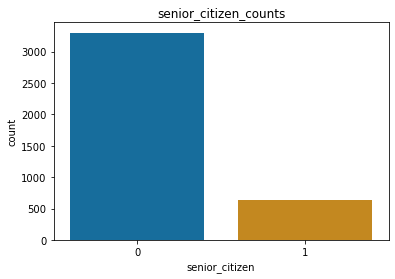

                  multiple_lines_counts
No                                 1881
Yes                                1697
No phone service                    365


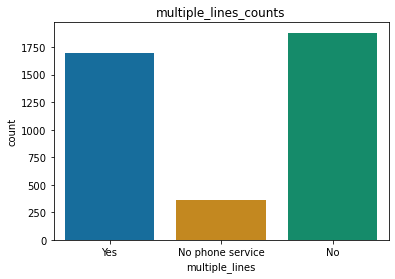

                contract_type_counts
Month-to-month                  2170
Two year                         924
One year                         849


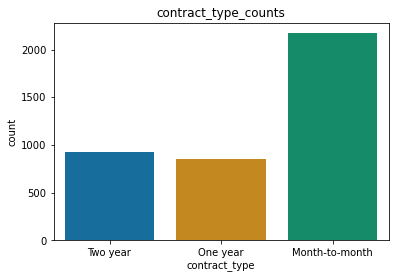

             internet_service_type_counts
Fiber optic                          1745
DSL                                  1349
None                                  849


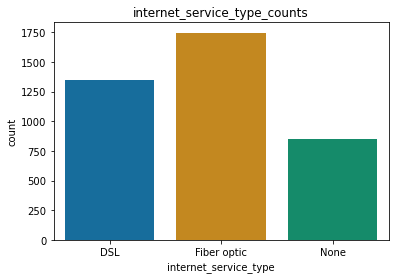

                           payment_type_counts
Electronic check                          1328
Mailed check                               877
Bank transfer (automatic)                  873
Credit card (automatic)                    865


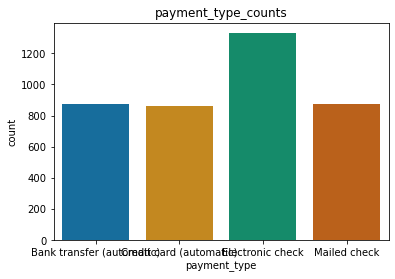

   is_male_counts
1            2007
0            1936


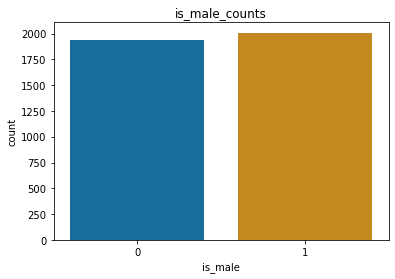

   has_partner_counts
0                2024
1                1919


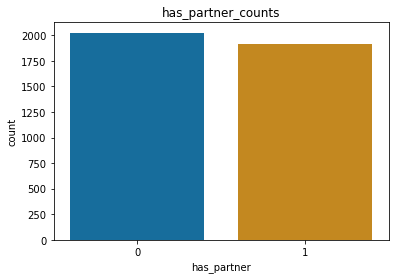

   has_dependents_counts
0                   2730
1                   1213


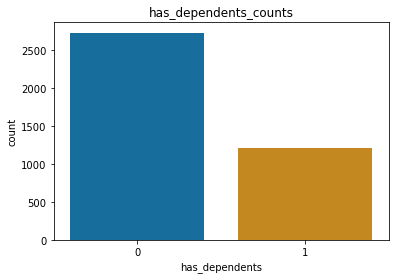

   online_security_counts
0                    2795
1                    1148


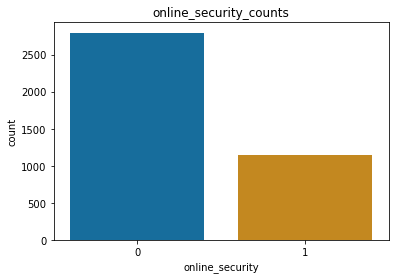

   online_backup_counts
0                  2551
1                  1392


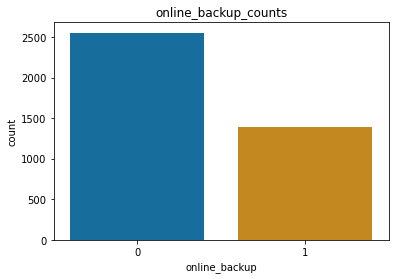

   device_protection_counts
0                      2541
1                      1402


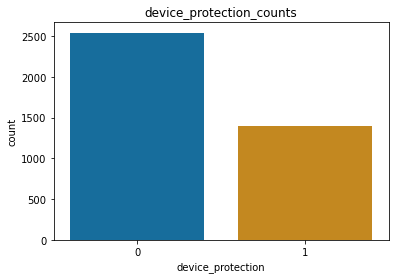

   tech_support_counts
0                 2788
1                 1155


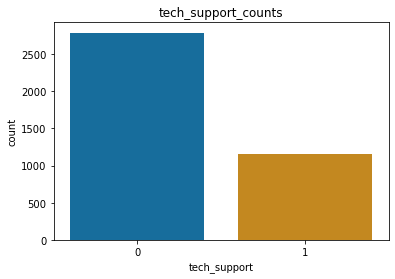

   streaming_tv_counts
0                 2391
1                 1552


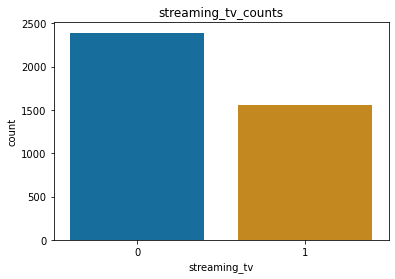

   streaming_movies_counts
0                     2378
1                     1565


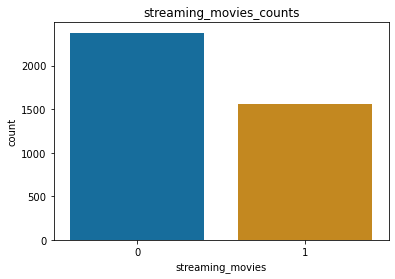

   paperless_billing_counts
1                      2345
0                      1598


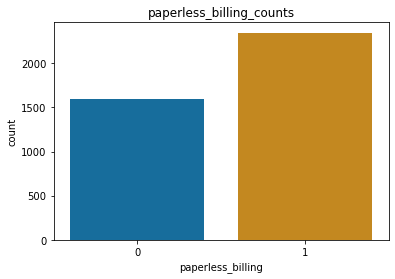

   churn_counts
0          2897
1          1046


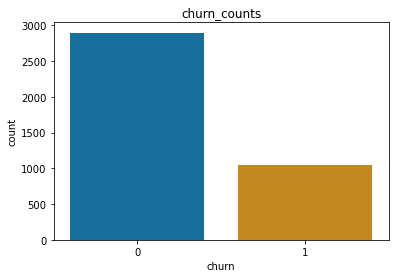

In [69]:
# Take a look at numerical columns (including overall churn)
for col in num_cols:
    
    # Display the counts of each category
    print(pd.DataFrame(train[col].value_counts())
          .rename(columns={col: f'{col}_counts'}))    
    # Plot a barplot to represent the counts
    sns.countplot(data=train,
                  x=col,
                 palette = 'colorblind')
    plt.title(f'{col}_counts')
    plt.show()

Text(0, 0.5, 'Customer Count')

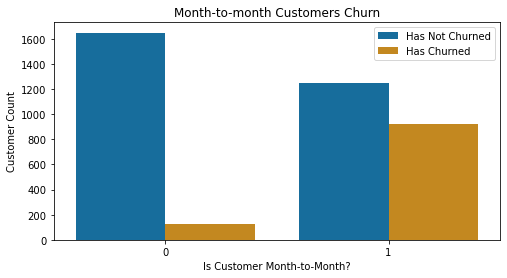

In [70]:
plt.figure(figsize = (8, 4))
sns.countplot(x='month_to_month_contract', hue = 'churn', palette = 'colorblind', data = train)
plt.title('Month-to-month Customers Churn')
plt.legend(labels = ['Has Not Churned', 'Has Churned'])
plt.xlabel('Is Customer Month-to-Month?')
plt.ylabel('Customer Count')


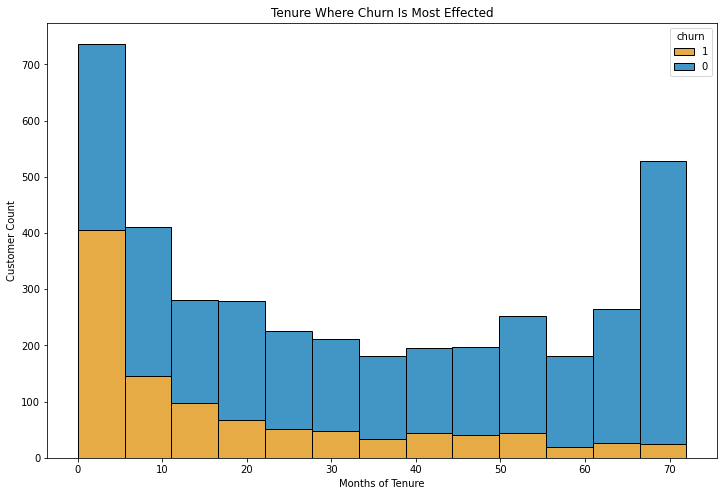

In [71]:
plt.figure(figsize=(12,8))
# Distribution of Tenure
sns.histplot(train,
             x=train.tenure,
             hue='churn',
             multiple = 'stack',
             palette = 'colorblind',
             legend=False
             )

plt.title("Tenure Where Churn Is Most Effected")
plt.xlabel('Months of Tenure')
plt.ylabel('Customer Count')
plt.legend(title = 'churn', loc='upper right',labels=[1,0])

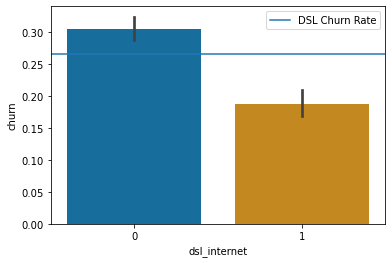

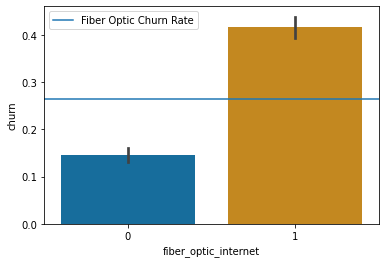

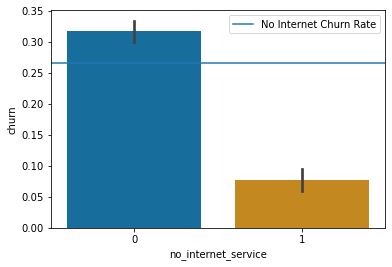

In [72]:
plt.title('')
sns.barplot(x="dsl_internet", 
            y="churn", 
            data=train, 
            palette='colorblind')
population_churn_rate = train.churn.mean()
plt.axhline(population_churn_rate, label="DSL Churn Rate")
plt.legend()
plt.show()


plt.title('')
sns.barplot(x="fiber_optic_internet", 
            y="churn", 
            data=train, 
            palette='colorblind')
population_churn_rate = train.churn.mean()
plt.axhline(population_churn_rate, label="Fiber Optic Churn Rate")
plt.legend()
plt.show()


plt.title('')
sns.barplot(x="no_internet_service", 
            y="churn", 
            data=train, 
            palette='colorblind')
population_churn_rate = train.churn.mean()
plt.axhline(population_churn_rate, label="No Internet Churn Rate")
plt.legend()
plt.show()

## Modeling

In [97]:
# Create columns to use in the x_train
x_cols =['month_to_month_contract',
         'fiber_optic_internet',
         'electronic_check_nonauto',
         'monthly_charges',
         'paperless_billing',
         'senior_citizen']

In [98]:
# Set x_ and y_train
x_train = train[x_cols]
y_train = train[['churn']]

In [99]:
# Sanity Checks
x_train.head(3)

,month_to_month_contract,fiber_optic_internet,electronic_check_nonauto,monthly_charges,paperless_billing,senior_citizen
5310,0,0,0,89.85,1,1
3790,0,0,0,77.35,0,1
4398,0,1,1,100.25,0,1


In [100]:
y_train.head(3)

,churn
5310,0
3790,0
4398,0


In [101]:
# Set the baseline for churn
y_train['baseline']=0
y_train.head()

,churn,baseline
5310,0,0
3790,0,0
4398,0,0
2635,0,0
2986,0,0


In [94]:
# Check the baseline value
baseline_score = accuracy_score(y_train.churn,y_train.baseline)
baseline_score

0.7347197565305605

## Decision Tree Time

In [106]:
tree = DecisionTreeClassifier()

In [107]:
tree.fit(x_train,y_train.churn)

DecisionTreeClassifier()